In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans

(120, 120, 3)


"\ncv2.imshow opens a new window, but because we are in a ipynb notebook, we use plt instead\nUse cv2.imshow if you are running in a .py script\n\ncv2.imshow('Image', img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

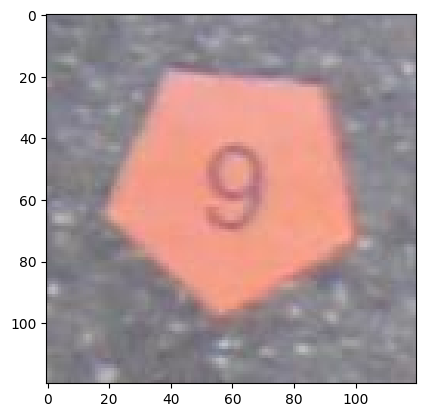

In [4]:
# Reading and displaying images
img = cv2.imread('t2.jpg')
# cv2 and plt expect two different color formats
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(np.shape(img))

'''
cv2.imshow opens a new window, but because we are in a ipynb notebook, we use plt instead
Use cv2.imshow if you are running in a .py script

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''


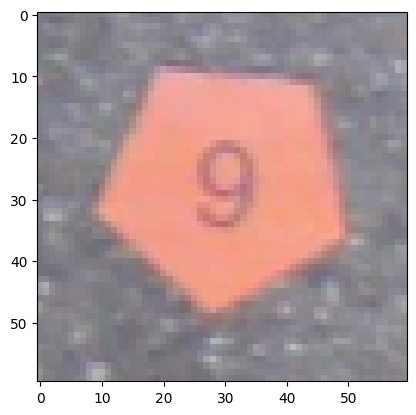

In [5]:
# Resizing
new_size = (60, 60)  # Specify the new width and height as a tuple
scaled_img = cv2.resize(img, new_size)
plt.imshow(scaled_img)

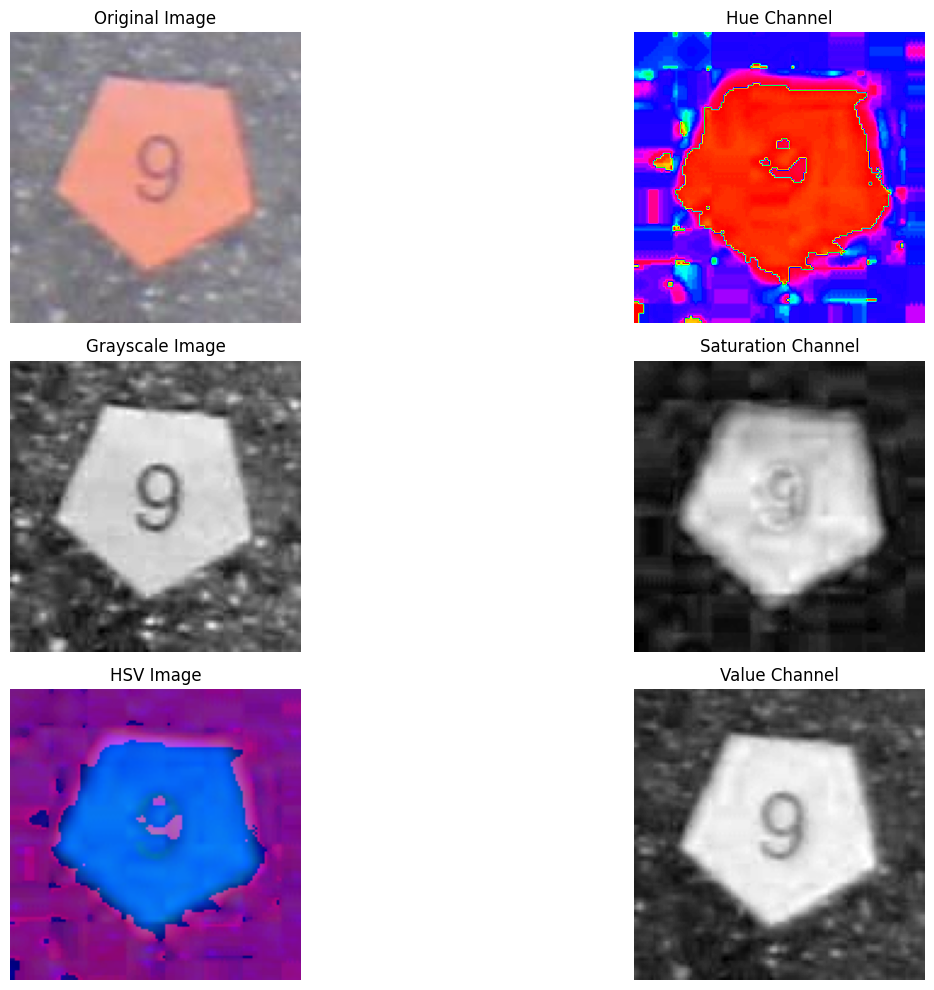

In [6]:
# Color channels

# Changing to HSV may help with feature identification
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Grayscale can help simplify images and
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

h, s, v = cv2.split(hsv_img)
plt.figure(figsize=(16, 10))

# Original Image
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# HSV Image
plt.subplot(3, 2, 5)
plt.imshow(hsv_img)  # Display HSV image
plt.title('HSV Image')
plt.axis('off')

# Grayscale Image
plt.subplot(3, 2, 3)
plt.imshow(gray_img, cmap='gray')  # Display Grayscale image
plt.title('Grayscale Image')
plt.axis('off')

# Hue Channel
plt.subplot(3, 2, 2)
plt.imshow(h, cmap='hsv')  # Display Hue channel
plt.title('Hue Channel')
plt.axis('off')

# Saturation Channel
plt.subplot(3, 2, 4)
plt.imshow(s, cmap='gray')  # Display Saturation channel
plt.title('Saturation Channel')
plt.axis('off')

# Value Channel
plt.subplot(3, 2, 6)
plt.imshow(v, cmap='gray')  # Display Value channel
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

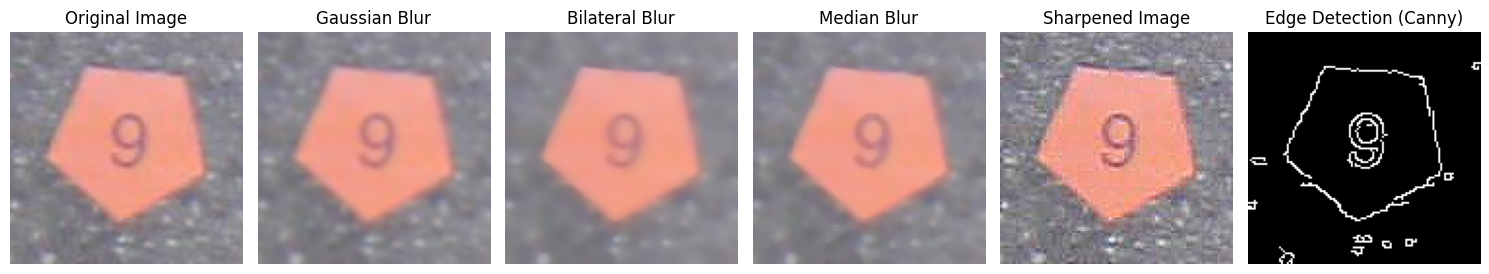

In [7]:
# Filters (Blur, sharpening, edge detection, high/low pass)
plt.figure(figsize=(15, 10))

# 1. Blur Filter (Gaussian Blur)
# Blurring can reduce noise, which smooths edges

# Gaussian blur reduces noise but is not as good as preserving edges
blurred = cv2.GaussianBlur(img, (5, 5), 0)
# Bilateral blur is better at preserving edges
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
# Median is also good at preserving edges
median_blurred = cv2.medianBlur(img, ksize=5)

# 2. Sharpening Filter
# Sharpening can enhance edges but can also amplify noise
sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpening_kernel)

# 3. Edge Detection (Canny) with lower and upper thresholds
edges = cv2.Canny(img, 100, 200)

# Displaying the images
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(blurred)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(bilateral_filtered)
plt.title('Bilateral Blur')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(median_blurred)
plt.title('Median Blur')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(sharpened)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')


plt.tight_layout()
plt.show()

(-0.5, 119.5, 119.5, -0.5)

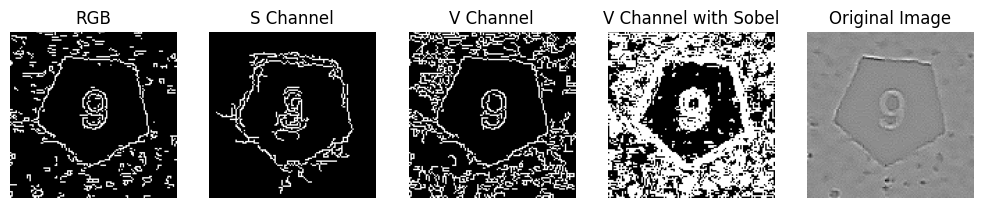

In [8]:
# Edge Detection

plt.figure(figsize=(15, 10))
# Replace img with bilateral_filtered
edges = cv2.Canny(sharpened, 150, 200)

new_hsv = cv2.cvtColor(sharpened, cv2.COLOR_RGB2HSV)

s_channel = new_hsv[:, :, 1]
edges_s = cv2.Canny(s_channel, 50, 200)
v_channel = new_hsv[:, :, 2]
edges_v = cv2.Canny(v_channel, 50, 200)

sobel_x = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(v_channel, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
edge_threshold = 50  # Adjust this threshold as needed
sobel = np.uint8(gradient_magnitude > edge_threshold)

new_gray = cv2.cvtColor(bilateral_filtered, cv2.COLOR_RGB2GRAY)
laplacian = cv2.Laplacian(new_gray, cv2.CV_64F)

plt.subplot(1, 6, 1)
plt.imshow(edges, cmap='gray')
plt.title('RGB')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(edges_s, cmap='gray')
plt.title('S Channel')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(edges_v, cmap='gray')
plt.title('V Channel')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(sobel, cmap='gray')
plt.title('V Channel with Sobel')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Original Image')
plt.axis('off')

In [9]:
# Finding contours in cv2
contours, _ = cv2.findContours(sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
# Create an entirely black image with the same dimensions as the base image
contour_image = np.zeros_like(sobel)
# Modify the black image so the pixels in the shape are white
cv2.drawContours(contour_image, [largest_contour], -1, 255, thickness=cv2.FILLED)
# cv2.drawContours(contour_image, contours, -1, 255, thickness=cv2.FILLED)

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       ...,
       [  0, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)

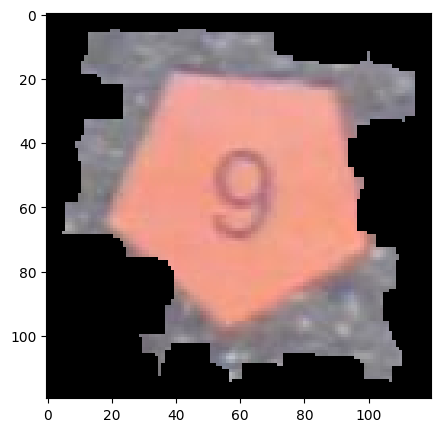

In [10]:
# Bitmasks
kernel = np.ones((9, 9), np.uint8)  # Adjust kernel size as needed
eroded_mask = cv2.erode(contour_image, kernel, iterations=1)
eroded_mask = eroded_mask.astype(np.uint8)
result_image = cv2.bitwise_and(contour_image, contour_image, mask=eroded_mask)
final_image = cv2.bitwise_and(img, img, mask=result_image)
#final_image = cv2.bitwise_and(img, img, mask=contour_image)
fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(final_image, cmap='gray')
ax.axis('on')
plt.show()

[('red', 623), ('blue', 1308), ('purple', 1652), ('green', 22), ('orange', 4559), ('yellow', 4)]


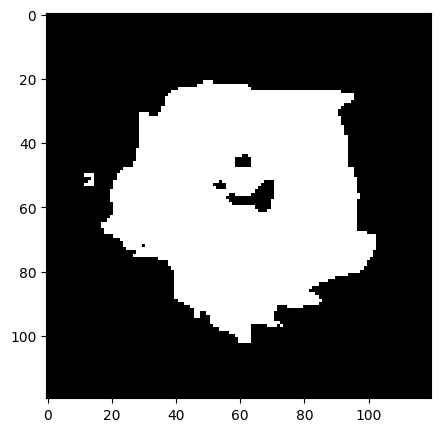

In [11]:
# Thresholding
hsv = cv2.cvtColor(final_image, cv2.COLOR_RGB2HSV)
red_mask = cv2.inRange(hsv, (165, 10, 0), (180, 255, 255)) #red
blue_mask = cv2.inRange(hsv, (100, 10, 0), (125, 255, 255)) #blue
purple_mask = cv2.inRange(hsv, (125, 10, 0), (165, 255, 255)) #purple
green_mask = cv2.inRange(hsv, (50, 10, 0), (100, 255, 255)) #green
yellow_mask = cv2.inRange(hsv, (20, 10, 0), (50, 255, 255)) #green
orange_mask = cv2.inRange(hsv, (0, 10, 0), (20, 255, 255)) #orange

mask_sums = [
    ('red', np.sum(red_mask > 0)),
    ('blue', np.sum(blue_mask > 0)),
    ('purple', np.sum(purple_mask > 0)),
    ('green', np.sum(green_mask > 0)),
    ('orange', np.sum(orange_mask > 0)),
    ('yellow', np.sum(yellow_mask > 0))
]
print(mask_sums)
fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(orange_mask, cmap='gray')
ax.axis('on')
plt.show()

In [12]:
#  Finding moments (center of a shape)
M = cv2.moments(largest_contour)
if M['m00'] != 0:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    print(f"Centered location: {cX}, {cY}")
else:
    cX, cY = 0, 0
cv2.drawContours(contour_image, [largest_contour], -1, 255, thickness=cv2.FILLED)
cv2.circle(contour_image, (cX, cY), 5, (0, 0, 0), -1)

Centered location: 60, 57


array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       ...,
       [  0, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)

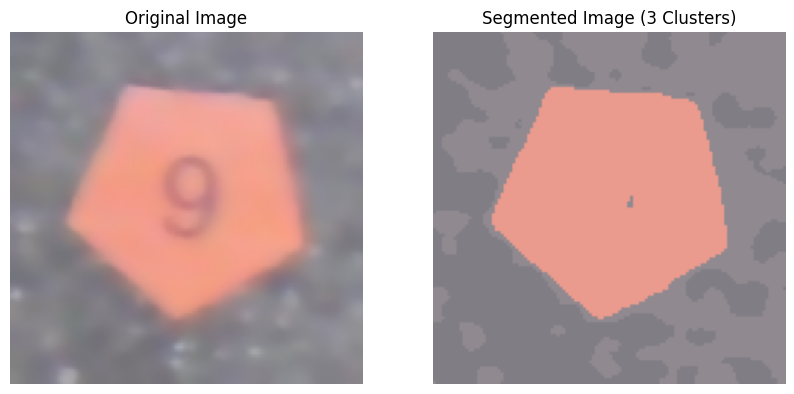

[[144 137 144]
 [235 155 141]
 [128 125 132]]


In [13]:
# KMeans
pixels = bilateral_filtered.reshape((-1, 3))
pixels = np.float32(pixels)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(bilateral_filtered.shape)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(bilateral_filtered)
axes[0].set_title('Original Image')
axes[1].imshow(segmented_img)
axes[1].set_title('Segmented Image (3 Clusters)')
for ax in axes:
    ax.axis('off')
plt.show()
print(centers)